In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pickle

In [2]:
df = pd.read_csv('Crop_recommendation_Dataset.csv')

In [3]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [4]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [5]:
# Splitting into train and test data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [6]:
#random Forest Model
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [7]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [8]:
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'CR_RF.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [9]:
def get_user_input():
    input_values = []
    print("Enter the following values for prediction:")
    input_values.append(float(input("Nitrogen: ")))
    input_values.append(float(input("Potassium: ")))
    input_values.append(float(input("Phosphorous: ")))
    input_values.append(float(input("Temperature: ")))
    input_values.append(float(input("Humidity: ")))
    input_values.append(float(input("pH: ")))
    input_values.append(float(input("Rainfall: ")))
    return input_values

In [10]:
# Get user input
user_input = get_user_input()

Enter the following values for prediction:


In [11]:
# Convert user input to 2D input. This makes it a single-row DataFrame.
input_columns = np.array([['Nitrogen', 'Potassium', 'Phosphorous','Temparature', 'Humidity ', 'pH', 'Rainfall']])
print(input_columns)

[['Nitrogen' 'Potassium' 'Phosphorous' 'Temparature' 'Humidity ' 'pH'
  'Rainfall']]


In [15]:
# Convert user input to a 2D array
input_columns = np.array(user_input).reshape(1, -1)


In [16]:
#Making Prediction
prediction = RF.predict(input_columns)
print(prediction)

['rice']


c:\Users\VIRAT\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


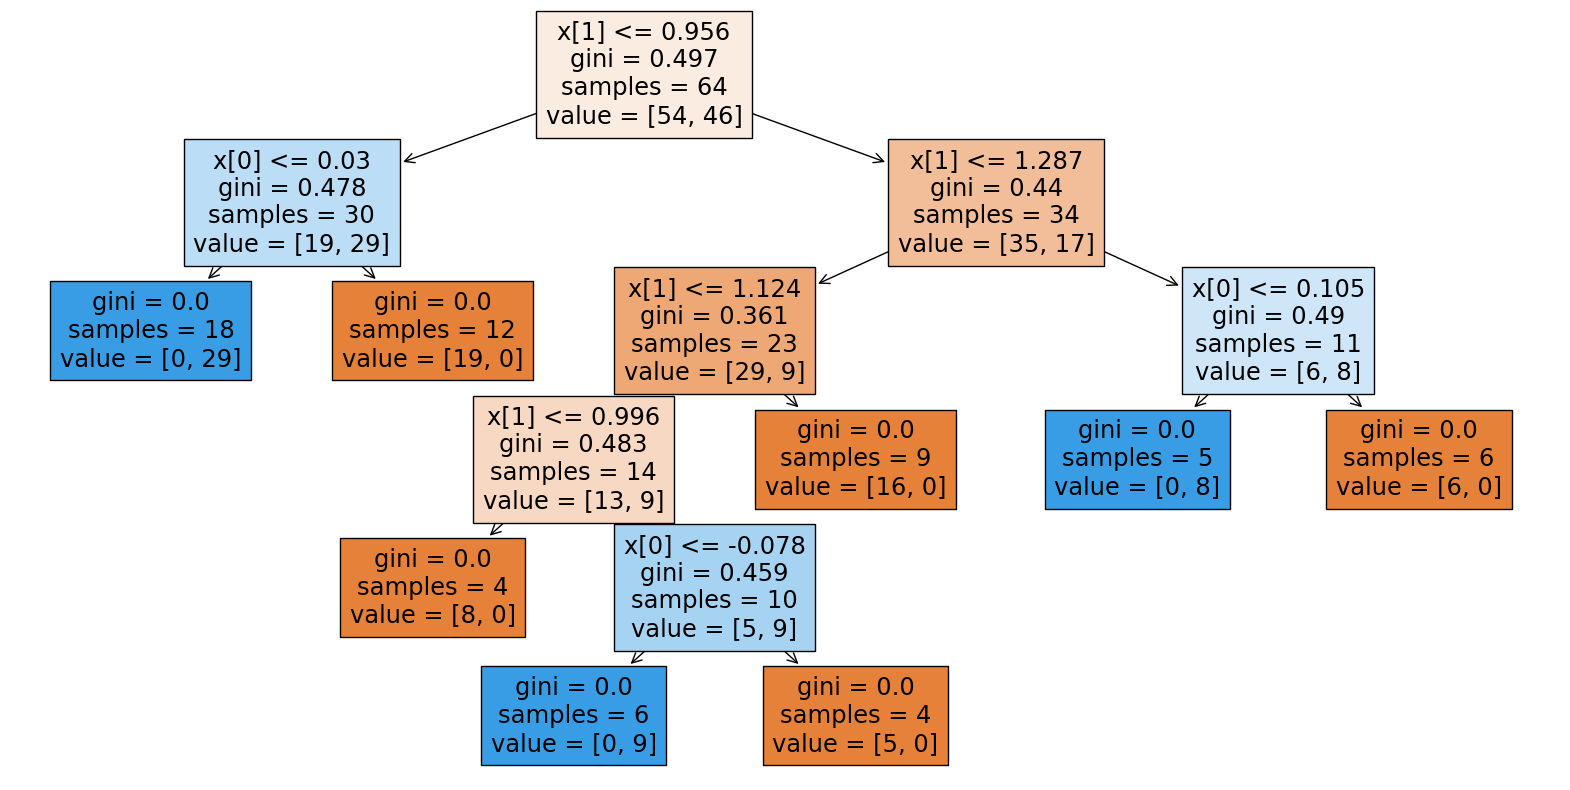

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Let's say your RF model is stored in the variable 'RF'
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(RF.estimators_[0], filled=True)  # Change the index to visualize different trees
plt.show()


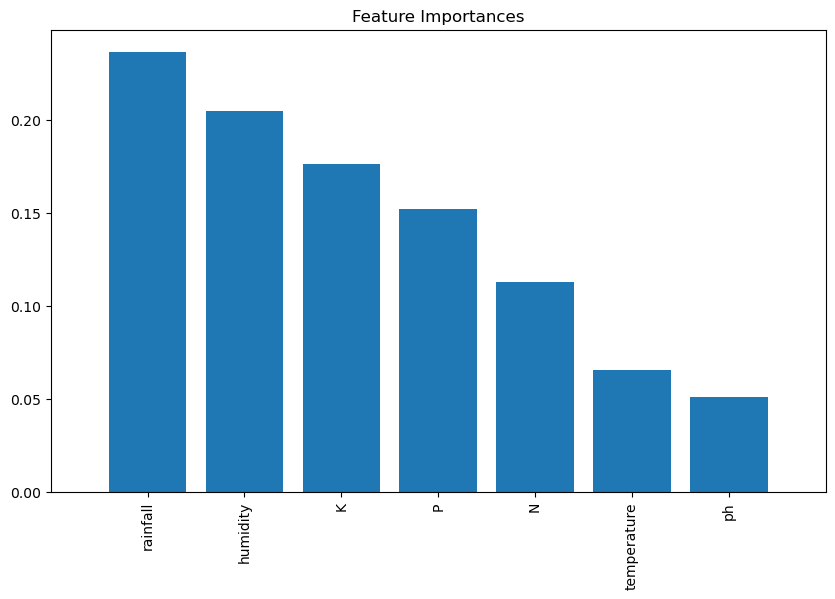

In [18]:
importances = RF.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(features.shape[1]), importances[indices], align="center")
plt.xticks(range(features.shape[1]), features.columns[indices], rotation=90)
plt.xlim([-1, features.shape[1]])
plt.show()
